### Decision Tree 

Decision tree is an supervised machine learning technique which can handle both classification and regression problems.It is more versatile and widely used algorithem.It work's better on complex dataset.It will more powerfull when we combine with ensemble techniques, As we discussed the ensemble techniques later, DecisionTree works by splitting the data in to nodes like a tree like structure,Splitting of the nodes based on the if,else condition. Let's say The boy will go to the playground or not like examples we genearlly see in the dataset. It is easy to understand how the algorithem actually works on the given dataset. Easy to implement


### Terminology used in Decisiontree

__DecisionTreeRegressor__

When performing regression with a decision tree, we try to divide the given values of X into distinct and non-overlapping regions, e.g. for a set of possible values X1, X2,..., Xp; we will try to divide them into J distinct and non-overlapping regions R1, R2, . . . , RJ. For a given observation falling into the region Rj, the prediction is equal to the mean of the response(y) values for each training observations(x) in the region Rj. The regions R1,R2, . . . , RJ are selected in a way to reduce the following sum of squares of residuals :



___Parameters of Decisiontreeregressor___

(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)

__Tree Pruning__

Tree pruning is a method of trimming down a full tree to reduce the complexity and variance in the data. As we reularised in the linear regresion algorithem, We can also regularize the decision tree by adding a new term known as tree pruning.


__Post pruning__

Post pruning is also known as backward pruning, it is the process where the decision tree genrated first and then the non-significant branches are removed.Croos validaton used to check the effect of pruning and test whether expanding a node will cause any improvementor not, If any improvement is there we try to countinue the expanding the node else if there is a reduction in accuracy then the node not be expanded and should converted in to a leaf node

__Pre pruning__

Pre pruning is also known as forward pruning, Stops the non-signicant branches from generating.It uses a conditon to decide the when should it terminate splitting of some of the branches  permeturly as the tree is generated.


__DecisionTreeClassifier__

Regression tree are used for the quantitative data, Whereas qualitative or categorical data is used for the classification usecases.In the regression usecases we split the node based on the RSS(Residual sum of squres) criteria while in classification problem we done by using the classification error rate i.e., Entropy,Gini impurity.

___Parameters of DecisionTreeClassifier___

(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

__Entropy__

Entropy measure the randomness in the data. In otherwords, it gives the impurity present in the data.

When split our node in to two regions and put observation's in both the region's, the main goal is to reduce the entropy,i.e., reduce the randomness in the region and divide our data cleanly then it was in the previous node. If splitting the node lead to the reduction, we try split the data based on the conditions, or we stop.A region is clean(low entropy) when the data with have same labels and if the random a mixture of different labels present(high entropy)

The entropy given set as :--
                       
                    E= -p*log2(p) - q*log2(q)

__Information gain__

Information gain calculates the decrease in entropy after splitting a node. These can be termed as the differences between the entropies after and before split. The more the information gain the more the entropy is removed.

__Gini impurity__

According to wikipedia, ‘Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.’ It is calculated by multiplying the probability that a given observation is classified into the correct class and sum of all the probabilities when that particular observation is classified into the wrong class. Let’s suppose there are k number of classes and an observation belongs to the class ‘i’, then Ginni impurity is given as:

Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution. The node for which the Ginni impurity is least is selected as the root node to split.

## Problem statemant
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [17]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report

In [2]:
#Load the url
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

#Read the url by using a read_csv
df=pd.read_csv(url,usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'])

#Get the data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Data Analysis

In [3]:
def get_info(data):
    print('-----Shape of the data------')
    print('Number of records: ',data.shape[0])
    print('Number of variables: ',data.shape[1],'\n')
    print('*'*20)
    print('Get the info')
    print(data.info(),'\n')
    print('*'*20)
    print('Columns names')
    print(data.columns)
    print('*'*20)
    print('Get the statistical info of the data')
    print(data.describe())

In [4]:
get_info(df)

-----Shape of the data------
Number of records:  891
Number of variables:  7 

********************
Get the info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
None 

********************
Columns names
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
********************
Get the statistical info of the data
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.3086

In [5]:
#Get the missing values in the data
def miss_dat(data):
    df=pd.DataFrame({"Missing_values":data.isnull().sum(),"Percentage of missing":(data.isnull().sum()/data.shape[0])/2})
    return df

In [6]:
miss_dat(df)

,Missing_values,Percentage of missing
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.099327
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


As we noticed there is a missing values in the age column, We need to handle that by using mean,median,mode or knn imputer.

In [12]:
#Get the dtype,count of the data
def count_df(data):
    dtype=data.dtypes
    count=data.nunique()
    count_data=pd.DataFrame({"Dtype":dtype,
                            "Unique_count":count})
    return count_data

In [13]:
count_df(df)

,Dtype,Unique_count
Survived,int64,2
Pclass,int64,3
Sex,object,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248


Get the categorical data i.e.,Dtype='Object'

In [14]:
def cateogrical_data(data):
    cat_data=[feature for feature in data.columns if data[feature].dtype == 'O']
    cat_d=data[cat_data]
    return cat_d

In [16]:
cateogrical_data(df.head())

,Sex
0,male
1,female
2,female
3,female
4,male


In [20]:
#Plot the cat_data with the help of countplot
def plot_count(data,variable):
    plt.figure(figsize=(7,6))
    ax=sns.countplot(data[variable],palette='dark')
    ax.set_title(variable.capitalize(),fontsize=19)
    plt.show()
    return ax

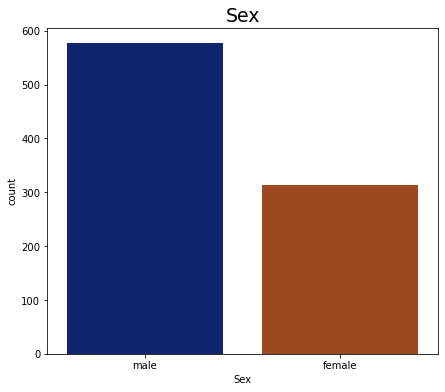

In [21]:
plot_count(df,'Sex')

Get the numerical data i.e., Dtype='int' or 'float'

In [22]:
def num_data(data):
    num_data=[i for i in data.columns if data[i].dtype !='O']
    num_d=data[num_data]
    return num_d

In [24]:
num_data(df.head())

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
#Display the plots 
def distplot(data,variable):
    plt.figure(figsize=(7,6))
    plt.style.use('fivethirtyeight')
    gx=sns.distplot(data[variable],bins=20)
    gx.set_title(variable)
    return gx

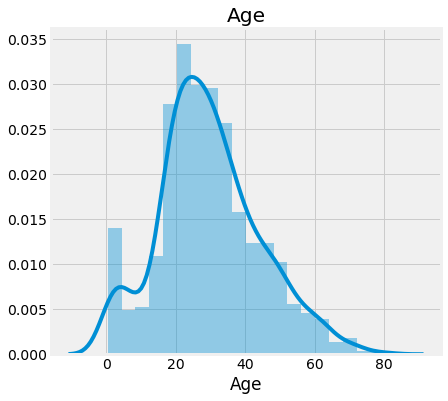

In [26]:
#Display the age columns 
distplot(df,'Age')

Look's like the age column is normally distributed.We don't need to worry about the feature transformations.

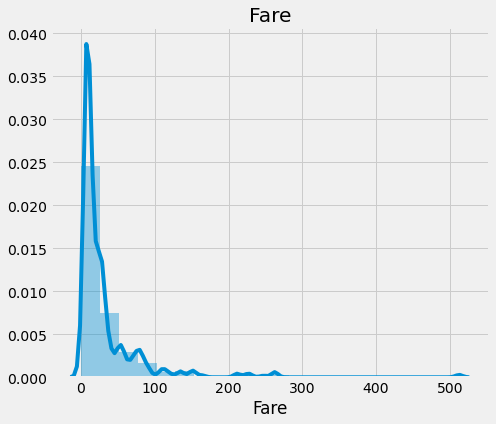

In [27]:
#Display the Fare column
distplot(df,'Fare')

The Fare column is Right skewed we need to transform using feature transformation techniques

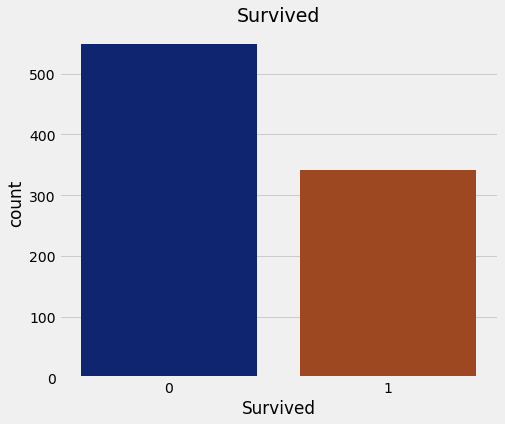

In [28]:
#Check the data is balanced or not
plot_count(df,'Survived')

As we can see The 'Survived' or target column is balanced we don't need to perform Oversampling and Uppersampling.

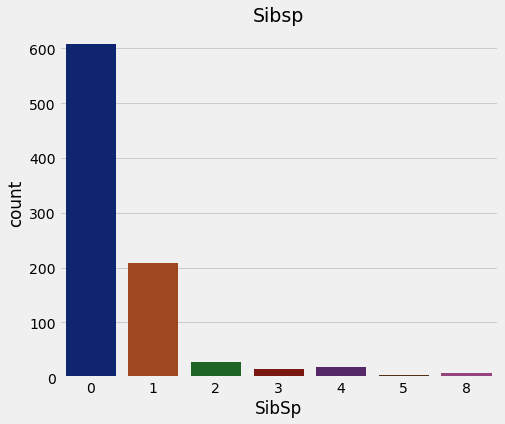

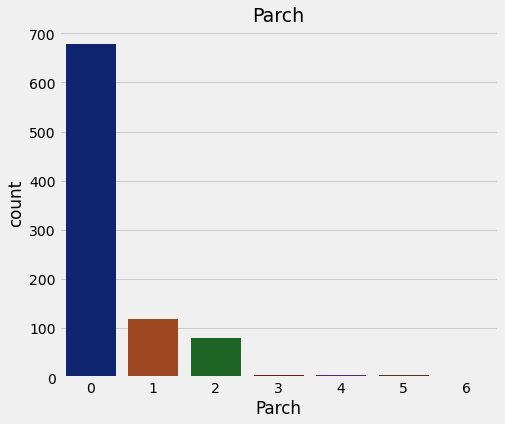

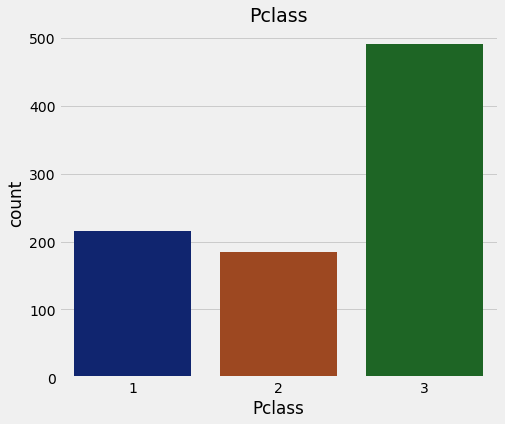

In [42]:
#Check out the other variables in the data by using plots
plot_count(df,'SibSp')
plot_count(df,'Parch')
plot_count(df,'Pclass')
plt.show()

In [51]:
#Check the correlation with the help of heatmap
def heatmap(df):
    plt.figure(figsize=(10,8))
    cr=sns.heatmap(df.corr(),annot=True,cmap='viridis')
    cr.set_title("Correlation between the variables")
    print(df.corr())
    plt.show()

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


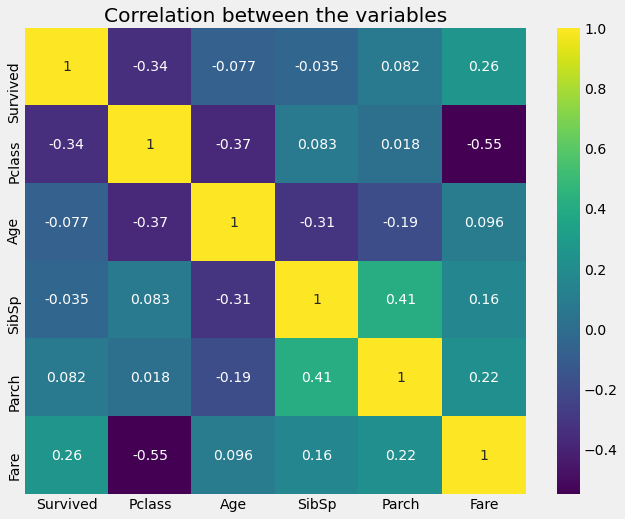

In [52]:
heatmap(df)

In [59]:
#Check the reation ship between the categorical variale by using croos_table
def croos_tab_plot(variable,data,target='Survived'):
    g=pd.crosstab(df[variable],df[target])
     #Plot the cross table which returns the stacked plot which gives the realtionship between the variables
    g.plot.bar(figsize=(10,5))
    plt.title(variable.capitalize() +" vs "+ target,fontsize=20)
    plt.show()

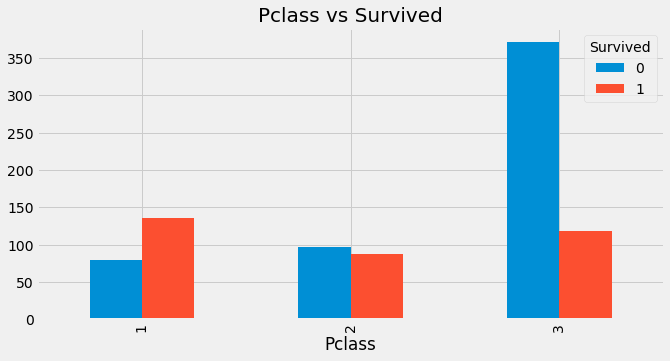

In [60]:
croos_tab_plot('Pclass',df)

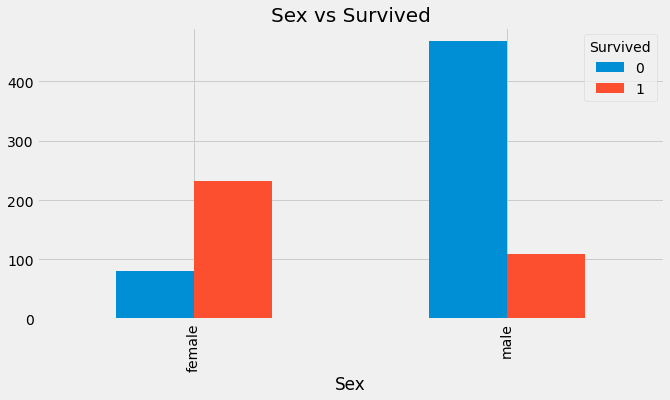

In [61]:
croos_tab_plot('Sex',df)

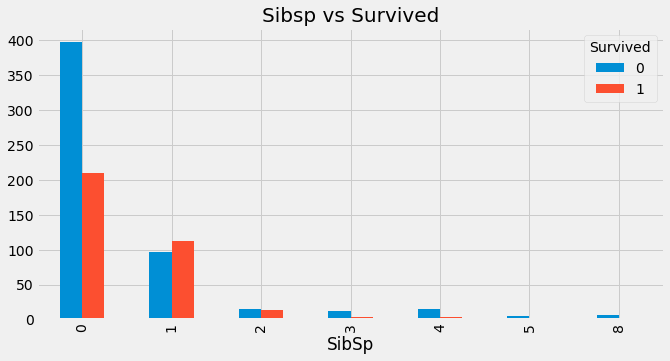

In [62]:
croos_tab_plot('SibSp',df)

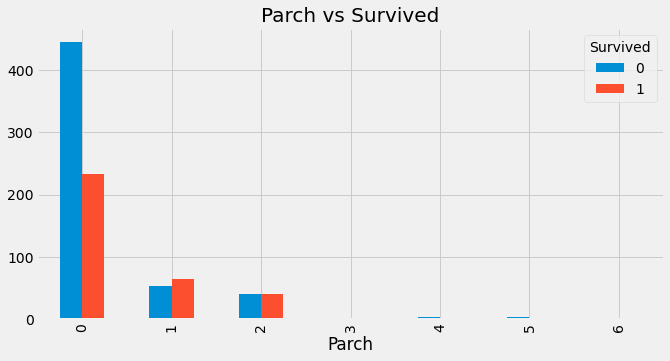

In [63]:
croos_tab_plot('Parch',df)

C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


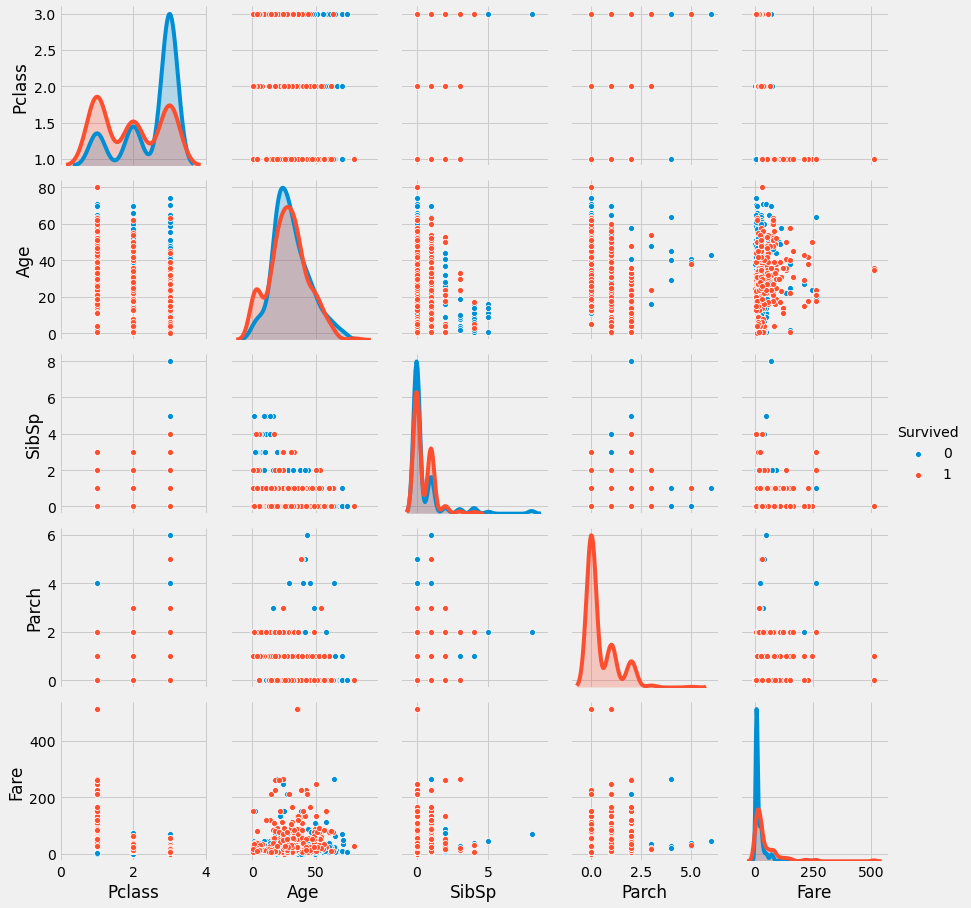

In [64]:
#Check the relationship between the variables to the target by the pairplot
sns.pairplot(df,hue='Survived')

In [82]:
#Check the realtionship between the numerical and cateorical data with the help of catplot
def plot_d2(df,variable,target='Survived'):
    plt.figure(figsize=(8,7))
    cat_plot=sns.catplot(x=target,y=variable,data=df,kind='boxen',palette='bwr')
    plt.title('Relation ship between the '+variable+' and '+target)

<Figure size 576x504 with 0 Axes>

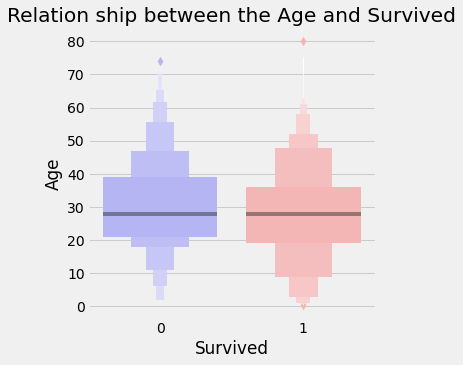

In [83]:
plot_d2(df,'Age')

<Figure size 576x504 with 0 Axes>

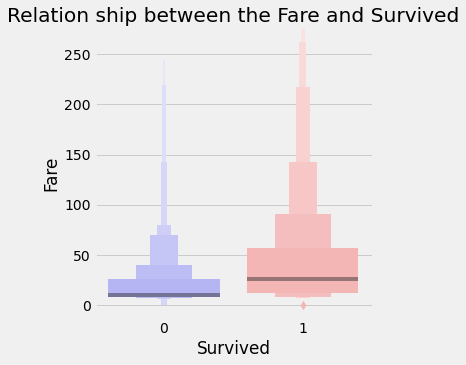

In [84]:
plot_d2(df,'Fare')

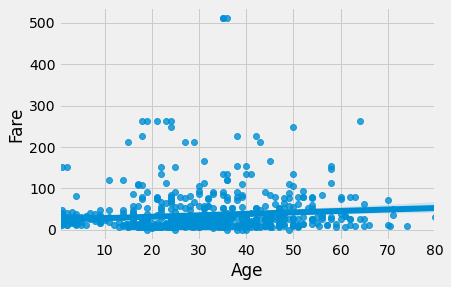

In [103]:
sns.regplot(df['Age'],df['Fare'])

Change the 'Sex' column in to numerical by using 'Dummyvalues' or labelencoder or mapping the variables in to numerical

In [105]:
sex={'male':1,'female':0}
#mapp the 'sex' column
df['Sex']=df['Sex'].map(sex)

In [106]:
#After converting the categorical data
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

Let's handle the missing values in the column such as 'Age' we use KnnImputer for filling down the missing values in the column as it may fill the null values based on the nearest point.We need to give the 'n_neighbor' for the model as it select the in which point is nearer to the null values and then fill the values with the nearest value.

In [108]:
#Feature engineering
#Handle the missing values in the 'Age' column
from sklearn.impute import KNNImputer
knn_imput=KNNImputer(n_neighbors=2)
df['Age']=knn_imput.fit_transform(df[['Age']])

In [109]:
#Check after imputing the missing values in the 'Age' column
df['Age'].isnull().sum()

0

In [111]:
#Split the data in to x and y
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']


#Splitting the data in to train and test split tht 80/20 rule 80% For training set and remaning for test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=34)

As in case of Decision tree algorithem we don't need to be scale down the all values in the dataset Because it splitting up the nodes based on the conditions i.e., if and else statement. And also this model robust to the outlier's.

In [112]:
#Feature transformation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [114]:
#Model building using the Decision tree classifer
from sklearn.tree import DecisionTreeClassifier

#Intialize the model with some variable
dt=DecisionTreeClassifier()

#train the model with training data
dt.fit(x_train,y_train)

#Get the predictions on the test data
dt_pred=dt.predict(x_test)

#Display the predicted labels 
predicted=pd.DataFrame({'Actual':y_test,'Predicted':dt_pred})

#Get the predicted data
predicted.head()

,Actual,Predicted
846,0,0
572,1,0
532,0,0
714,0,0
486,1,1


In [118]:
#Check the accuracy score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy_score: ',accuracy_score(y_test,dt_pred))
print('Classification_report: ',classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

Accuracy_score:  0.7349228611500701
Classification_report:                precision    recall  f1-score   support

           0       0.80      0.77      0.78       443
           1       0.64      0.69      0.66       270

    accuracy                           0.73       713
   macro avg       0.72      0.73      0.72       713
weighted avg       0.74      0.73      0.74       713

[[339 104]
 [ 85 185]]


In [117]:
#Check the score on both training data and test data
print('Training_Data: ',dt.score(x_train,y_train))
print('Testing_data: ',dt.score(x_test,y_test))

Training_Data:  0.9831460674157303
Testing_data:  0.7349228611500701


As you can see the The model gives us a low bias, high variance that means our model performs well on the training data whenever the test data comes in to picture it tende's to overfitting this is the major disadvantage of the decision tree.

To handle the overfitting, we try to use 
* Cross validation
* regularization

In [140]:
#Let's try with cross validation to minize the error
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,x,y,cv=10,scoring='accuracy')

In [141]:
cv.mean()

0.7710861423220973

#### Hypertune the model

(__DecisionTree parameters__:
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)

In [142]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
DecisionTreeClassifier()
param={'criterion':['gini','entrpoy'],
      'splitter':['best','random'],
      'max_depth':[2,5,8,10,15],
      'min_samples_split':[2,4,6,8,9],
      'max_features':['auto','sqrt']}

In [143]:
random=RandomizedSearchCV(dt,param_distributions=param,cv=10,verbose=3,scoring='accuracy',n_jobs=-1,n_iter=10)

In [144]:
random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entrpoy'],
                                        'max_depth': [2, 5, 8, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 4, 6, 8, 9],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [145]:
random.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=6,
                       splitter='random')

In [146]:
random.best_params_

{'splitter': 'random',
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

In [149]:
hyp_random=random.best_estimator_
hyp_random_pred=hyp_random.predict(x_test)

#Get the score
print('Trianing set: ',hyp_random.score(x_train,y_train))
print('Testing set: ',hyp_random.score(x_test,y_test))

Trianing set:  0.8764044943820225
Testing set:  0.7784011220196353


Intially our model can't perform well on the test data but after hypertuning the model it decreases the variance on the test data.

In [153]:
#Predictions 1
data=np.array([[3,1,22.0,1,0,7.2500]])
#Scale the data
scaled_data=sc.transform(data)
#Get the predictions 
Predictions=hyp_random.predict(scaled_data)
if Predictions == 1:
    print('The person is Survived')
else:
    print('The person is not survived')

The person is not survived


In [157]:
#Predictions 2
data=np.array([[2,0,45,3,2,65]])
#Scale the data
scaled_data=sc.transform(data)
#Get the predictions 
Predictions=hyp_random.predict(scaled_data)
if Predictions == 1:
    print('The person is Survived')
else:
    print('The person is not survived')

The person is Survived


In [158]:
#Dump the file
import pickle
pickle.dump(hyp_random,open('Decision_tree.pickle','wb'))